## Exercice : Analyse des genres littéraires

**Restriction : Les fonctions lambda ne sont pas autorisées**

L'objectif de cet exercice est d'évaluer les différences stylistiques entre les textes des genres du roman policier et celui du roman sentimental. 

---

1. **Ouverture des fichiers :**
   - Créer une fonction qui ouvre les fichiers `.txt` du dossier `data`, contenant 5 textes policiers et 5 textes sentimentaux.

2. **Calcul des fréquences relatives :**
   - Développer une fonction qui calcule la fréquence relative des N=100 mots les plus fréquents dans chaque texte (relative à la longueur du texte).
   - La fonction doit retourner et sauvegarder le résultat sous la forme d'un dataframe (10 lignes = 10 textes, 100 colonnes = 100 mots).

3. **Prise en compte des mots-outils :**
   - Ajouter une fonction similaire, mais qui utilise le fichier `mots_outils_fr.json` (une liste des mots outils pour le français).
   - Cette fonction doit ignorer les mots présents dans cette liste lors du calcul des fréquences.
   - Vous pouvez améliorer ou adapter cette liste de mots-outils à votre convenance.

4. **Calcul des distances cosinus :**
   - Écrire une fonction qui calcule la distance cosinus entre chaque texte et la moyenne des textes de son genre respectif (le vecteur moyen du genre).
   - La fonction doit retourner et sauvegarder les distances sous la forme d'un dataframe.

5. **Interprétation des résultats :**
   - Comparer les résultats obtenus avec et sans les mots-outils.
   - Les textes sentimentaux se distinguent-ils plus clairement des policiers lorsque les mots-outils sont inclus ? Pour quelles raisons ? Quels cas limites ?

6. **Bonus : Visualisation des résultats :**
   - Créer des visualisations des distances calculées, comme :
     - Une carte de chaleur (heatmap) des distances.
     - Un nuage de points regroupant les textes par proximité stylistique.
   - Justifiez votre choix de visualisation.

# Import des librairies

In [63]:
import os
import json
import numpy as np
import pandas as pd
from collections import Counter
from glob import glob
import spacy
import matplotlib.pyplot as plt

In [46]:
glob('data/*.txt')

['data/1909_Leblanc-Maurice_L-Aiguille-creuse.txt',
 'data/1932_Simenon-Georges_Le-Fou-de-Bergerac.txt',
 'data/1908_Leroux-Gaston_Le-mystere-de-la-chambre-jaune.txt',
 'data/1955_Delly_Ourida.txt',
 'data/1931_Simenon-Georges_La-Guinguette-a-deux-sous.txt',
 'data/1928_Delly_Cœurs-ennemis-Laquelle.txt',
 'data/1934_Veuzit-Max-du_La-chataigneraie.txt',
 "data/1905_Delly_L'etincelle.txt",
 'data/1922_Alanic-Mathilde_La-route-ardente.txt',
 'data/1957_Malet-Leo_Boulevard-ossements.txt']

# Fonction qui charge nos textes

In [4]:
def load_fichiers_depuis_dossier(path_to_dossier):
    textes = []
    for roman in glob(path_to_dossier):
       with open(roman) as fichier_courant:
           textes.append(fichier_courant.read())
    return textes

In [5]:
mes_romans = load_fichiers_depuis_dossier('data/*.txt')

# Fonction qui tokenise nos textes

In [6]:
def tokenise(liste_romans):
    liste_mots_globale = []
    liste_liste_romans = []
    nlp = spacy.load("fr_core_news_sm")

    for roman_str in liste_romans:
        doc = nlp(roman_str)
        list_tokens_roman = [token.text for token in doc if token.is_alpha]
        liste_mots_globale.extend(list_tokens_roman)
        liste_liste_romans.append(list_tokens_roman)
    return liste_mots_globale, liste_liste_romans

In [7]:
list_global_novels, list_list_novel = tokenise(mes_romans)

In [8]:
len(list_global_novels)

494145

In [9]:
len(list_list_novel)

10

# Fonction qui compte les fréquences relatives des 100 mots les plus fréquents

In [47]:
titres = [titre.split("/")[1] for titre in glob('data/*.txt')]

In [48]:
def compte_freq(list_globale, list_list_romans, titres_romans):
    conteur_global = dict(Counter(list_globale).most_common(100))
    liste_clés = [clé for clé, valeur in conteur_global.items()]

    data = []
    for roman in list_list_romans:
        dico_mots_roman = dict(Counter(roman))
        dico_final = {clé: valeur/sum(dico_mots_roman.values()) for clé, valeur in dico_mots_roman.items() if clé in liste_clés}
        data.append(dico_final)

    return pd.DataFrame(data, columns=liste_clés, index=titres_romans)

In [50]:
df_freq = compte_freq(list_global_novels, list_list_novel, titres)

In [51]:
df_freq

,de,la,le,à,et,que,un,en,il,les,...,dont,aussi,porte,petite,Maigret,tu,dire,avez,avoir,quand
1909_Leblanc-Maurice_L-Aiguille-creuse.txt,0.042489,0.025521,0.024774,0.018411,0.022517,0.013626,0.013252,0.010605,0.015713,0.012930,...,0.001408,0.000882,0.001629,0.000967,0.000034,0.001663,0.001052,0.000882,0.000594,0.000848
1932_Simenon-Georges_Le-Fou-de-Bergerac.txt,0.036891,0.020679,0.022741,0.021304,0.011464,0.014275,0.015431,0.011808,0.015806,0.011120,...,0.000500,0.001656,0.001374,0.001031,0.009402,0.002780,0.001624,0.001156,0.001312,0.001437
1908_Leroux-Gaston_Le-mystere-de-la-chambre-jaune.txt,0.041354,0.028542,0.025953,0.019065,0.019676,0.017783,0.010601,0.009368,0.015609,0.009111,...,0.001319,0.001246,0.002675,0.000489,NaN,0.000098,0.001405,0.000928,0.001502,0.001661
1955_Delly_Ourida.txt,0.045960,0.025035,0.016816,0.019032,0.016721,0.012631,0.014695,0.011286,0.009790,0.008692,...,0.001648,0.000871,0.000814,0.002992,NaN,0.003257,0.000682,0.000757,0.001212,0.001155
1931_Simenon-Georges_La-Guinguette-a-deux-sous.txt,0.038535,0.025426,0.020975,0.022316,0.011189,0.011646,0.016981,0.013048,0.013750,0.012073,...,0.000793,0.001799,0.001037,0.000823,0.008506,0.000640,0.001616,0.001250,0.000823,0.000884
1928_Delly_Cœurs-ennemis-Laquelle.txt,0.042223,0.020797,0.015563,0.018534,0.016665,0.011766,0.014835,0.013261,0.008224,0.011235,...,0.001790,0.001417,0.000551,0.002125,NaN,0.000649,0.000787,0.001003,0.000846,0.001397
1934_Veuzit-Max-du_La-chataigneraie.txt,0.039682,0.018149,0.016425,0.019234,0.016234,0.019330,0.011860,0.012770,0.012514,0.008604,...,0.000910,0.001197,0.000431,0.000798,NaN,0.001181,0.001453,0.001580,0.001820,0.001453
1905_Delly_L'etincelle.txt,0.040483,0.026535,0.014133,0.017541,0.029209,0.010357,0.016466,0.012402,0.003881,0.011563,...,0.001573,0.000891,0.000787,0.001390,NaN,0.000603,0.000393,0.001259,0.000970,0.000236
1922_Alanic-Mathilde_La-route-ardente.txt,0.044144,0.030064,0.020179,0.018468,0.019601,0.007715,0.012223,0.010656,0.003544,0.014249,...,0.001157,0.000940,0.000988,0.000940,NaN,0.001013,0.000530,0.000699,0.000651,0.000868
1957_Malet-Leo_Boulevard-ossements.txt,0.035943,0.018206,0.018840,0.017502,0.016798,0.015555,0.018394,0.012317,0.010745,0.009127,...,0.000704,0.001736,0.000985,0.000469,NaN,0.000446,0.002065,0.002182,0.001056,0.000563


# Fonction distance cosine

In [18]:
def cosine_distance(vec1, vec2):
    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 1  # Retourne la distance maximale si l'un des vecteurs est nul
    return 1 - dot / (norm1 * norm2)

# Fonction qui calcule la cosine entre chaque ligne (roman) du dataframe de fréquences

In [52]:
def compute_all_cosine_distance_matrix(df):
    """
    Calcule la matrice des distances cosinus entre chaque paire de textes (lignes du DataFrame)
    en utilisant une double boucle for.
    Retourne un DataFrame dont les index et colonnes sont les noms des fichiers.
    """
    n = df.shape[0]
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        vec_i = df.iloc[i].values
        for j in range(n):
            vec_j = df.iloc[j].values
            distance_matrix[i, j] = cosine_distance(vec_i, vec_j)
    return pd.DataFrame(distance_matrix, index=df.index, columns=df.index)

In [53]:
df_freq.fillna(0, inplace=True) # Important, on remplace les "Not a Number" par 0 pour que la cosine fonctionne !

In [60]:
distance_tout_roman = compute_all_cosine_distance_matrix(df_freq)

In [61]:
distance_tout_roman

,1909_Leblanc-Maurice_L-Aiguille-creuse.txt,1932_Simenon-Georges_Le-Fou-de-Bergerac.txt,1908_Leroux-Gaston_Le-mystere-de-la-chambre-jaune.txt,1955_Delly_Ourida.txt,1931_Simenon-Georges_La-Guinguette-a-deux-sous.txt,1928_Delly_Cœurs-ennemis-Laquelle.txt,1934_Veuzit-Max-du_La-chataigneraie.txt,1905_Delly_L'etincelle.txt,1922_Alanic-Mathilde_La-route-ardente.txt,1957_Malet-Leo_Boulevard-ossements.txt
1909_Leblanc-Maurice_L-Aiguille-creuse.txt,0.000000,3.933232e-02,2.029402e-02,3.553256e-02,3.720534e-02,4.158017e-02,0.071750,5.678240e-02,4.113600e-02,0.069781
1932_Simenon-Georges_Le-Fou-de-Bergerac.txt,0.039332,4.440892e-16,5.184356e-02,5.602986e-02,9.535684e-03,5.949419e-02,0.083245,1.034782e-01,8.756010e-02,0.064966
1908_Leroux-Gaston_Le-mystere-de-la-chambre-jaune.txt,0.020294,5.184356e-02,1.110223e-16,4.081570e-02,5.447347e-02,5.030908e-02,0.055475,7.163137e-02,5.978298e-02,0.066894
1955_Delly_Ourida.txt,0.035533,5.602986e-02,4.081570e-02,-4.440892e-16,5.384797e-02,7.527529e-03,0.061905,2.987107e-02,3.120408e-02,0.073281
1931_Simenon-Georges_La-Guinguette-a-deux-sous.txt,0.037205,9.535684e-03,5.447347e-02,5.384797e-02,-2.220446e-16,5.838442e-02,0.091462,9.570269e-02,7.178017e-02,0.077179
1928_Delly_Cœurs-ennemis-Laquelle.txt,0.041580,5.949419e-02,5.030908e-02,7.527529e-03,5.838442e-02,-2.220446e-16,0.061991,2.397487e-02,3.215803e-02,0.068683
1934_Veuzit-Max-du_La-chataigneraie.txt,0.071750,8.324484e-02,5.547542e-02,6.190516e-02,9.146187e-02,6.199135e-02,0.000000,1.016780e-01,1.096879e-01,0.033147
1905_Delly_L'etincelle.txt,0.056782,1.034782e-01,7.163137e-02,2.987107e-02,9.570269e-02,2.397487e-02,0.101678,-2.220446e-16,3.136724e-02,0.102550
1922_Alanic-Mathilde_La-route-ardente.txt,0.041136,8.756010e-02,5.978298e-02,3.120408e-02,7.178017e-02,3.215803e-02,0.109688,3.136724e-02,-2.220446e-16,0.108192
1957_Malet-Leo_Boulevard-ossements.txt,0.069781,6.496620e-02,6.689422e-02,7.328146e-02,7.717899e-02,6.868305e-02,0.033147,1.025505e-01,1.081924e-01,0.000000


# Fonction de plot distance tout roman

In [68]:
def plot_heatmap_tout(distance_df):
    plt.figure(figsize=(8, 6))
    plt.imshow(distance_df.values, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Distance cosinus')
    plt.xticks(range(len(distance_df.columns)), distance_df.columns, rotation=90)
    plt.yticks(range(len(distance_df.index)), distance_df.index)
    plt.title("Heatmap des distances cosinus")
    plt.tight_layout()
    plt.show()

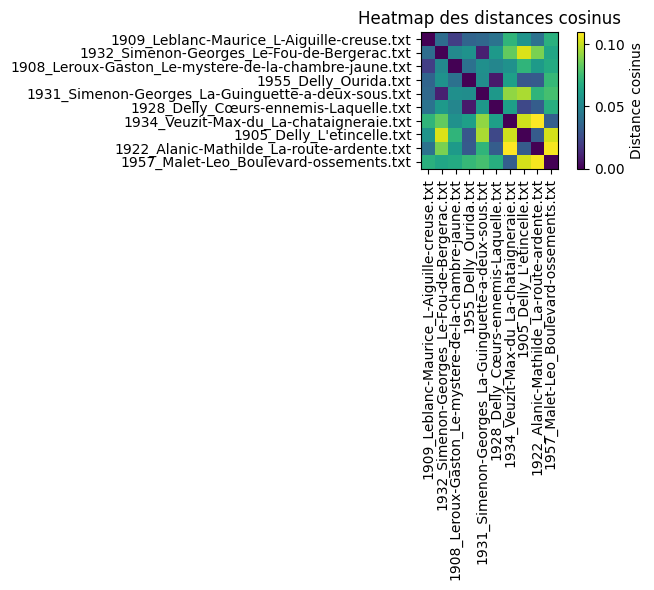

In [70]:
plot_heatmap_tout(distance_tout_roman)

# Fonction qui calcule la cosine entre chaque ligne (roman) et chaque moyenne du genre

In [71]:
def compute_genre_cosine_distances(df, genre_mapping):
    """
    Calcule la distance cosinus entre chaque texte et le vecteur moyen de son genre.
    
    Paramètres:
      df (DataFrame): DataFrame des fréquences (une ligne par texte)
      genre_mapping (dict): Dictionnaire où la clé est le nom du fichier et la valeur le genre.
      
    Retourne:
      DataFrame: Un DataFrame à une colonne ('cosine_distance') contenant, pour chaque texte,
                 la distance cosinus par rapport au vecteur moyen de son genre.
    """
    # Construction d'un mapping pour chaque texte basé sur le nom (les index du df sont supposés être les noms de fichiers)
    processed_mapping = {}
    for fname in df.index:
        # On suppose que df.index contient le nom de fichier (e.g. "1905_Delly_L'etincelle.txt")
        processed_mapping[fname] = genre_mapping.get(fname, "inconnu")
    
    # Calculer le vecteur moyen pour chaque genre
    genre_vectors = {}
    for genre in set(processed_mapping.values()):
        # Sélectionner tous les textes appartenant à ce genre
        indices = [fname for fname, g in processed_mapping.items() if g == genre]
        # Calcul de la moyenne sur ces lignes
        genre_vectors[genre] = df.loc[indices].mean().values
    
    # Calcul de la distance cosinus pour chaque texte par rapport à son vecteur moyen de genre
    distances = {}
    for fname in df.index:
        genre = processed_mapping.get(fname, "inconnu")
        vec = df.loc[fname].values
        distances[fname] = cosine_distance(vec, genre_vectors[genre])
    
    return pd.DataFrame.from_dict(distances, orient='index', columns=['cosine_distance'])


In [72]:
with open("data/genre_labels.json", 'r', encoding='utf-8') as f:
    genre_mapping = json.load(f)

In [73]:
distances_genres = compute_genre_cosine_distances(df_freq, genre_mapping)

In [74]:
distances_genres

,cosine_distance
1909_Leblanc-Maurice_L-Aiguille-creuse.txt,0.013527
1932_Simenon-Georges_Le-Fou-de-Bergerac.txt,0.013737
1908_Leroux-Gaston_Le-mystere-de-la-chambre-jaune.txt,0.018846
1955_Delly_Ourida.txt,0.006414
1931_Simenon-Georges_La-Guinguette-a-deux-sous.txt,0.016290
1928_Delly_Cœurs-ennemis-Laquelle.txt,0.005484
1934_Veuzit-Max-du_La-chataigneraie.txt,0.047989
1905_Delly_L'etincelle.txt,0.017892
1922_Alanic-Mathilde_La-route-ardente.txt,0.021481
1957_Malet-Leo_Boulevard-ossements.txt,0.036897


In [75]:
# 5. Visualisations
def plot_heatmap_genres(distance_df):
    plt.figure(figsize=(6,4))
    # On crée une heatmap en affichant les distances sous forme d'image
    plt.imshow(distance_df.values.reshape(1, -1), cmap='viridis', aspect='auto')
    plt.colorbar(label='Distance cosinus')
    plt.yticks([])
    plt.xticks(range(len(distance_df.index)), distance_df.index, rotation=90)
    plt.title("Heatmap des distances cosinus")
    plt.show()

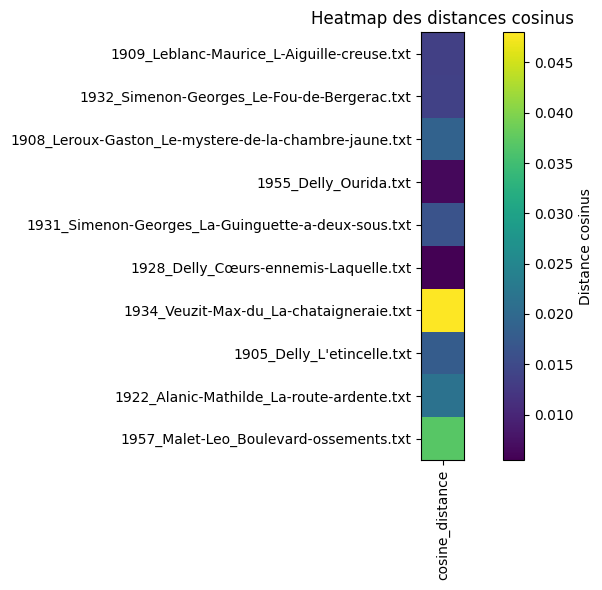

In [76]:
plot_heatmap(distances_genres)